# Intro to Data Science:  Workbook support for Project 1 - Short Questions

This notebook provides supporting information for the figures produced for answers to the supplementary questions for project 1

In [19]:
import os
from ggplot import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.formula.api as smf
%matplotlib inline

Import data:

In [20]:
os.chdir("F:\Users\Me\Google Drive\Udacity\Data_Science_Nano_Degree\Intro_to_Data_Science\intro_to_ds_programming_files\lesson_3\coefficient_of_determination")
turnstile_weather = pd.read_csv("turnstile_data_master_with_weather.csv")
print turnstile_weather

        Unnamed: 0  UNIT       DATEn     TIMEn  Hour    DESCn  \
0                0  R001  2011-05-01  01:00:00     1  REGULAR   
1                1  R001  2011-05-01  05:00:00     5  REGULAR   
2                2  R001  2011-05-01  09:00:00     9  REGULAR   
3                3  R001  2011-05-01  13:00:00    13  REGULAR   
4                4  R001  2011-05-01  17:00:00    17  REGULAR   
5                5  R001  2011-05-01  21:00:00    21  REGULAR   
6                6  R002  2011-05-01  01:00:00     1  REGULAR   
7                7  R002  2011-05-01  05:00:00     5  REGULAR   
8                8  R002  2011-05-01  09:00:00     9  REGULAR   
9                9  R002  2011-05-01  13:00:00    13  REGULAR   
10              10  R002  2011-05-01  17:00:00    17  REGULAR   
11              11  R002  2011-05-01  21:00:00    21  REGULAR   
12              12  R003  2011-05-01  00:00:00     0  REGULAR   
13              13  R003  2011-05-01  04:00:00     4  REGULAR   
14              14  R003 

# Section 1

## Ordinary Least Squares model

In [21]:
def predictions(turnstile_weather):
    dataframe = turnstile_weather
    #dataframe = weather_turnstile.loc[:,["DATEn"]] = weather_turnstile.DATEn.apply(lambda date: dt.datetime.strptime(date, "%Y-%m-%d").strftime("%a"))
    #print dataframe
    
    #call the smf.ols() function using C() for categorical variables
    #from wikipedia, citing Yates, Moore and Starn (2003) a categorical variable "is a variable 
    #that can take on one of a limited, and usually fixed, number of possible values, thus 
    #assigning each individual to a particular group or "category.""
    results = smf.ols(formula = "ENTRIESn_hourly ~ C(UNIT) + C(Hour)", data = dataframe).fit()
    print results.summary()
    return results.predict()

predictions(turnstile_weather)

                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     270.9
Date:                Wed, 10 Jun 2015   Prob (F-statistic):               0.00
Time:                        12:39:27   Log-Likelihood:            -1.1649e+06
No. Observations:              131951   AIC:                         2.331e+06
Df Residuals:                  131463   BIC:                         2.336e+06
Df Model:                         487                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        3986.7846    123.747     32.217      0.000      3744.243  4229.326
C(UNIT)[T.R002] -3068.8654    172.228

array([ 3610.43341162,  3153.13084957,  4254.57044826, ...,   126.50723373,
         126.50723373,   126.50723373])

# Section 3

## Histogram: Rain, No Rain

### Plot the raw ENTRIESn_hourly data based on whether it is raining or not

<module 'matplotlib.pyplot' from 'F:\Users\Me\Anaconda\lib\site-packages\matplotlib\pyplot.pyc'>

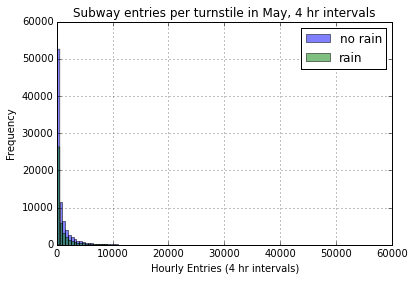

In [22]:

def entries_histogram(turnstile_weather):
    
    plt.figure()
    plt.axis([0,60000,0,60000])

    
    dataframe = turnstile_weather

    no_rain = dataframe['ENTRIESn_hourly'][dataframe['rain'] == 0]
    rain = dataframe['ENTRIESn_hourly'][dataframe['rain'] == 1]

    #http://matplotlib.org/users/pyplot_tutorial.html
    range_size = range(0, 60000, 500)
    
    ax = no_rain.plot(kind="hist", bins = range_size, alpha=0.5, title = "Subway entries per turnstile in May, 4 hr intervals", label = "no rain")
    rain.hist(bins = range_size, alpha=0.5, label = "rain")
    #label axis
    ax.set_xlabel('Hourly Entries (4 hr intervals)')
    ax.set_ylabel('Frequency')
    #add legend
    plt.legend()
    return plt


entries_histogram(turnstile_weather)

### Same as above, but prior to plotting, the data is aggregated by turnstile

<module 'matplotlib.pyplot' from 'F:\Users\Me\Anaconda\lib\site-packages\matplotlib\pyplot.pyc'>

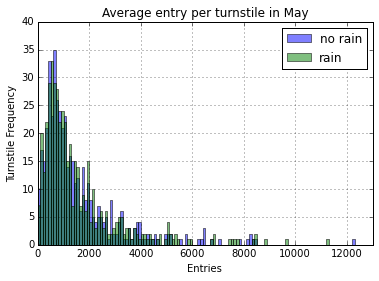

In [23]:
def entries_histogram(turnstile_weather):
    
    #initialize figure
    plt.figure()
    plt.axis([0,13000,0,40])#x range and y range of figure

    
    dataframe = turnstile_weather.groupby(["UNIT", "rain"], as_index=False).aggregate(np.mean)
    #print dataframe
    
    no_rain = dataframe['ENTRIESn_hourly'][dataframe['rain'] == 0]                                                            
    rain = dataframe['ENTRIESn_hourly'][dataframe['rain'] == 1]
    #print no_rain
    #print max(no_rain), max(rain)
    #http://matplotlib.org/users/pyplot_tutorial.html
    range_size = range(0, 13000, 100)
    
    ax = no_rain.plot(kind="hist", bins = range_size, alpha=0.5, title = "Average entry per turnstile in May", label = "no rain")
    rain.hist(bins = range_size, alpha=0.5, label = "rain")
    #label axis
    ax.set_xlabel('Entries')
    ax.set_ylabel('Turnstile Frequency')
    #add legend
    plt.legend()
    return plt


entries_histogram(turnstile_weather)

Failed attempt to implement histogram with ggplot or pandas

In [24]:
def histogram(turnstile_weather):
    """construct dataframes"""
    dataframe = turnstile_weather

 
    #plt.figure()
    #dataframe["ENTRIESn_hourly"].diff().hist(bins = 100, color = "rain")

    #no output from the following ggplot syntax taken from http://ggplot.yhathq.com/docs/geom_histogram.html
    #ggplot(dataframe, aes(x='ENTRIESn_hourly', fill='rain', color="rain")) + geom_histogram()
        
    
    #rain_data = pd.crosstab([dataframe.ENTRIESn_hourly, dataframe.rain])
    #print rain_data
    #dataframe.plot(kind="hist", alpha = 0.5)#stacked=True, bins = 20)

    
histogram(turnstile_weather)

## Box Plot: Rain, No Rain

1    4.875461
Name: ENTRIESn_hourly, dtype: float64


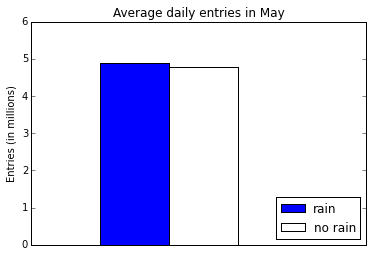

In [25]:
def box_rain(turnstile_weather):
    #pd.read_csv(turnstile_data)
    turnstile_weather = pd.read_csv("turnstile_data_master_with_weather.csv")

    """Construct the dataframes"""
    dataframe = turnstile_weather.copy()
    #group data according to whether or not it is raining
    dataframe = dataframe.groupby(["DATEn", "rain"], as_index=False).aggregate(np.sum)
    #print dataframeRain
    dataframe = dataframe.groupby(["rain"], as_index=False).aggregate(np.mean)
    
    """setup matplotlib figure"""
    fig = plt.figure()
    fig1 = fig.add_subplot(111)

    # the data
    N1=1

    rain = dataframe["ENTRIESn_hourly"][dataframe["rain"]==1]/1000000
    print rain
    #print rain1
    #rain1_std = rain1.std()
    no_rain = dataframe["ENTRIESn_hourly"][dataframe["rain"]==0]/1000000
    #print no_rain1
    #no_rain1_std = no_rain1.std()
    #additional required plot parameters
    ind = np.arange(N1)                # the x locations for the groups
    width = 0.35                      # the width of the bars
    
    # the bars
    rects1 = fig1.bar(ind, rain, width, color='blue')
    rects2 = fig1.bar(ind+width, no_rain, width, color='white')

    # axes and labels
    fig1.set_xlim(-width,len(ind)+width)
    fig1.set_ylim(0,6)
    fig1.set_ylabel('Entries (in millions)')
    fig1.set_title('Average daily entries in May')
    fig1.set_xticks(ind+width)
    fig1.axes.get_xaxis().set_visible(False)

    ## add a legend
    fig1.legend( (rects1[0], rects2[0]), ('rain', 'no rain') , loc=4)

    plt.show()
    
box_rain(turnstile_weather)

## Box Plot - day of week

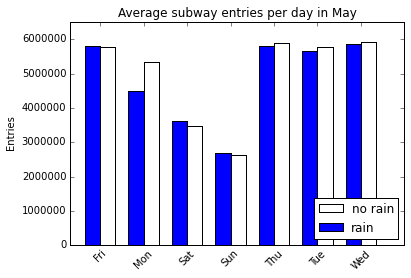

In [26]:
def box_by_day(turnstile_weather):
    """construct dataframes"""
    dataframe = turnstile_weather.copy()

    dataframe = dataframe.groupby(["DATEn", "rain"], as_index=False).aggregate(np.sum)
    #re-format the DATEn column to the day of the week
    dataframe.loc[:,["DATEn"]] = dataframe.DATEn.apply(lambda date: dt.datetime.strptime(date, "%Y-%m-%d").strftime("%a"))
    #print dataframe
    dataframe = dataframe.groupby(["DATEn", "rain"], as_index=False).aggregate(np.mean)
    #print dataframe
    #print dataframe

    """setup matplotlib figure"""
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # the data
    N=7
    #rain_std = 
    rain = dataframe["ENTRIESn_hourly"][dataframe["rain"]==1]
    #print rain
    #no_rain_std = 
    no_rain = dataframe["ENTRIESn_hourly"][dataframe["rain"]==0]
    #print no_rain
    #additional required plot parameters
    ind = np.arange(N)                # the x locations for the groups
    width = 0.35                      # the width of the bars
    
    # the bars
    rects2 = ax.bar(ind+width, no_rain, width, color='white')
    rects1 = ax.bar(ind, rain, width, color='blue')
    

    # axes and labels
    ax.set_xlim(-width,len(ind)+width)
    ax.set_ylim(0,6500000)
    ax.set_ylabel('Entries')
    ax.set_title('Average subway entries per day in May')
    ax.set_xticks(ind+width)
    labels = np.array(dataframe["DATEn"][dataframe["rain"]==1])
    xtickNames = ax.set_xticklabels(labels)
    plt.setp(xtickNames, rotation=45, fontsize=10)

    ## add a legend
    ax.legend( (rects2[0], rects1[0]), ('no rain', 'rain'), loc=4 )

    return plt.show()

box_by_day(turnstile_weather)

x-axis in above needs to be ordered by day of week

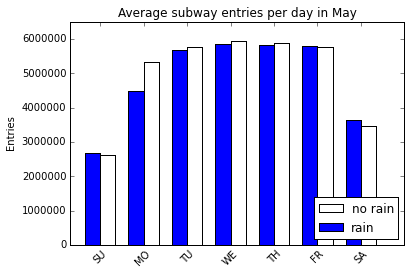

In [12]:
def box_by_day(turnstile_weather):
    """construct dataframes"""
    dataframe = turnstile_weather.copy()

    dataframe = dataframe.groupby(["DATEn", "rain"], as_index=False).aggregate(np.sum)
    #re-format the DATEn column to the day of the week
    dataframe.loc[:,["DATEn"]] = dataframe.DATEn.apply(lambda date: dt.datetime.strptime(date, "%Y-%m-%d").strftime("%w"))
    #print dataframe
    dataframe = dataframe.groupby(["DATEn", "rain"], as_index=False).aggregate(np.mean)
    #print dataframe
    #print dataframe

    """setup matplotlib figure"""
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # the data
    N=7
    #rain_std = 
    rain = dataframe["ENTRIESn_hourly"][dataframe["rain"]==1]
    #print rain
    #no_rain_std = 
    no_rain = dataframe["ENTRIESn_hourly"][dataframe["rain"]==0]
    #print no_rain
    #additional required plot parameters
    ind = np.arange(N)                # the x locations for the groups
    width = 0.35                      # the width of the bars
    
    # the bars
    rects2 = ax.bar(ind+width, no_rain, width, color='white')
    rects1 = ax.bar(ind, rain, width, color='blue')
    

    # axes and labels  
    ax.set_xlim(-width,len(ind)+width)
    ax.set_ylim(0,6500000)
    ax.set_ylabel('Entries')
    ax.set_title('Average subway entries per day in May')
    ax.set_xticks(ind+width)
    #labels = np.array(dataframe["DATEn"][dataframe["rain"]==1])
    labels = ["SU", "MO", "TU", "WE", "TH", "FR", "SA"]
    xtickNames = ax.set_xticklabels(labels)
    plt.setp(xtickNames, rotation=45, fontsize=10)

    ## add a legend
    ax.legend( (rects2[0], rects1[0]), ('no rain', 'rain'), loc=4 )

    return plt.show()

box_by_day(turnstile_weather)

Looking at the figure above, it looks like the average daily entries is lower on rainy days for tuesdays, wednesdays and thursdays, whereas on Friday, Saturday and Sunday there are more subway riders on rain days. On Mondays there seems to be a lot fewer subway riders.  However, the printout makes clear that there were only 9 rainy days during the month and one monday had a particularly low ridership level indicating that this was probably a holiday.  Since the day of the week is an important indicator for ridership levels, looking at average subway entries over the month is probably not going to give us very much insight in to how ridership is affected by rain since a higher frequency of rainy days falling on the weekend would mask increased ridership on weekends.

## Whisker plot

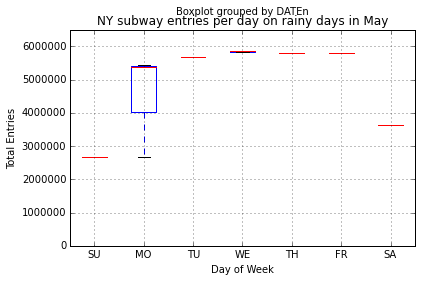

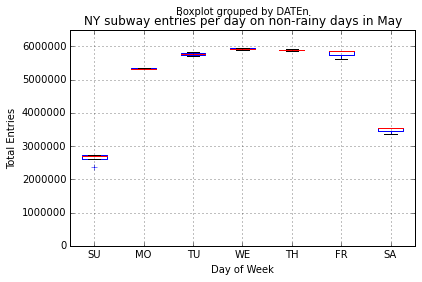

In [13]:
from matplotlib.dates import  DateFormatter, DayLocator

def whisker_plot(turnstile_weather):

    """Construct the dataframes"""
    dataframe = turnstile_weather.copy()

    #group data according to date and whether or not it is raining
    dataframe = dataframe.groupby(["DATEn", "rain"], as_index=False).aggregate(np.sum)
    #change date format to mon, tue, etc.
    dataframe.loc[:,["DATEn"]] = dataframe.DATEn.apply(lambda date: dt.datetime.strptime(date, "%Y-%m-%d").strftime("%w"))
    #aggregate data by day of week
    
    """plot data"""
    rain = dataframe[dataframe["rain"] == 1]
    no_rain = dataframe[dataframe["rain"] == 0]
    
    ax1 = rain.boxplot(column="ENTRIESn_hourly", by=["DATEn"])
    ax2 = no_rain.boxplot(column="ENTRIESn_hourly", by=["DATEn"])
    
    def plot_labels(ax):
        labels = ["SU", "MO", "TU", "WE", "TH", "FR", "SA"]
        ax.set_xlabel("Day of Week")
        ax.set_ylabel("Total Entries")
        ax.set_ylim(0,6500000)
        ax.set_xticklabels(labels)
        #ax.xaxis.set_major_formatter(DateFormatter("%b"))
        #ax.xaxis.set_major_locator(DayLocator())
        
    plot_labels(ax1)
    ax1.set_title("NY subway entries per day on rainy days in May")
    plot_labels(ax2)
    ax2.set_title("NY subway entries per day on non-rainy days in May")

    return plt.show()
    
whisker_plot(turnstile_weather)

A whisker plot for transit ridership during the month of May helps to illustrate the annomly for Mondays where we see a large data spread compared to other days. This is again likely because one monday during the month was a holiday. The higher average ridership we initially found for rainy days is likely due to fewer weekend/holiday data points relative to weekedays for the month of May.  Several rainy days had in the dataset only had one day of data indicated by the red line in the figure.  The limited dataset makes it more difficult to draw conclusions.  However, A comparison of entries for weekdays that aren't holidays (ridership>5 million), Saturdays (3.75 million>saturday ridership>3.25 million, and sundays/holidays (ridership < 3.25 million) would likely provide a more robust grouping for comparison. Unfortunately due to time constraints, additional analysis is currently beyond the scope of this assignment.

# Section 4

### Original independent variables implemented in Ordinary Least Squares Model¶

In [14]:
def predictions(turnstile_weather):
    dataframe = turnstile_weather
    #dataframe = weather_turnstile.loc[:,["DATEn"]] = weather_turnstile.DATEn.apply(lambda date: dt.datetime.strptime(date, "%Y-%m-%d").strftime("%a"))
    #print dataframe
    
    #call the smf.ols() function using C() for categorical variables
    #from wikipedia, citing Yates, Moore and Starn (2003) a categorical variable "is a variable 
    #that can take on one of a limited, and usually fixed, number of possible values, thus 
    #assigning each individual to a particular group or "category.""
    results = smf.ols(formula = "ENTRIESn_hourly ~ C(UNIT) + C(Hour) + precipi + maxtempi + minpressurei + meandewpti", data = dataframe).fit()
    print results.summary()
    return results.predict()

predictions(turnstile_weather)

                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     269.6
Date:                Wed, 10 Jun 2015   Prob (F-statistic):               0.00
Time:                        12:36:07   Log-Likelihood:            -1.1648e+06
No. Observations:              131951   AIC:                         2.331e+06
Df Residuals:                  131459   BIC:                         2.335e+06
Df Model:                         491                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        1.467e+04    966.247     15.186      0.000      1.28e+04  1.66e+04
C(UNIT)[T.R002] -3068.5975    172.079

array([ 3555.34500428,  3098.02161561,  4199.2089321 , ...,     4.60109182,
           4.60109182,     4.60109182])

An R-squared value of 0.502 represents a decent model fit for subway ridership, however, as we see below, removing precipi + maxtempi + minpressurei + meandewpti has little effect on the R-value

In [15]:
def predictions(turnstile_weather):
    dataframe = turnstile_weather
    #dataframe = weather_turnstile.loc[:,["DATEn"]] = weather_turnstile.DATEn.apply(lambda date: dt.datetime.strptime(date, "%Y-%m-%d").strftime("%a"))
    #print dataframe
    
    #call the smf.ols() function using C() for categorical variables
    #from wikipedia, citing Yates, Moore and Starn (2003) a categorical variable "is a variable 
    #that can take on one of a limited, and usually fixed, number of possible values, thus 
    #assigning each individual to a particular group or "category.""
    results = smf.ols(formula = "ENTRIESn_hourly ~ C(UNIT) + C(Hour)", data = dataframe).fit()
    print results.summary()
    return results.predict()

predictions(turnstile_weather)

                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     270.9
Date:                Wed, 10 Jun 2015   Prob (F-statistic):               0.00
Time:                        12:36:48   Log-Likelihood:            -1.1649e+06
No. Observations:              131951   AIC:                         2.331e+06
Df Residuals:                  131463   BIC:                         2.336e+06
Df Model:                         487                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        3986.7846    123.747     32.217      0.000      3744.243  4229.326
C(UNIT)[T.R002] -3068.8654    172.228

array([ 3610.43341162,  3153.13084957,  4254.57044826, ...,   126.50723373,
         126.50723373,   126.50723373])

Removing all of these independent variables had basically a negligible effect on R^2.  Now we add rain as a categorical variable:

In [16]:
def predictions(turnstile_weather):
    dataframe = turnstile_weather
    #dataframe = weather_turnstile.loc[:,["DATEn"]] = weather_turnstile.DATEn.apply(lambda date: dt.datetime.strptime(date, "%Y-%m-%d").strftime("%a"))
    #print dataframe
    
    #call the smf.ols() function using C() for categorical variables
    #from wikipedia, citing Yates, Moore and Starn (2003) a categorical variable "is a variable 
    #that can take on one of a limited, and usually fixed, number of possible values, thus 
    #assigning each individual to a particular group or "category.""
    results = smf.ols(formula = "ENTRIESn_hourly ~ C(UNIT) + C(Hour) + C(rain)", data = dataframe).fit()
    print results.summary()
    return results.predict()

predictions(turnstile_weather)

                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     270.4
Date:                Wed, 10 Jun 2015   Prob (F-statistic):               0.00
Time:                        12:37:29   Log-Likelihood:            -1.1649e+06
No. Observations:              131951   AIC:                         2.331e+06
Df Residuals:                  131462   BIC:                         2.336e+06
Df Model:                         488                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        3980.1496    123.787     32.153      0.000      3737.528  4222.771
C(UNIT)[T.R002] -3068.9858    172.226

array([ 3603.83941953,  3146.53689981,  4247.99619405, ...,   139.8732743 ,
         139.8732743 ,   139.8732743 ])

Adding rain as a categorical variable had no effect on R^2

### Updated model including day of week

Now the DATEn is re-formatted to the the day of the week (e.g. Sun, Mon, etc.) and added as a categorical variable:

In [17]:
#http://statsmodels.sourceforge.net/devel/example_formulas.html
def predictions(turnstile_weather):
    dataframe = turnstile_weather
    dataframe.loc[:,["DATEn"]] = dataframe.DATEn.apply(lambda date: dt.datetime.strptime(date, "%Y-%m-%d").strftime("%a"))
    #print dataframe
    
    #call the smf.ols() function using C() for categorical variables
    #from wikipedia, citing Yates, Moore and Starn (2003) a categorical variable "is a variable 
    #that can take on one of a limited, and usually fixed, number of possible values, thus 
    #assigning each individual to a particular group or "category.""
    results = smf.ols(formula = 'ENTRIESn_hourly ~ rain + C(UNIT) + C(Hour) + C(DATEn) + maxtempi', data = dataframe).fit()
    print results.summary()
    return results.predict() 

predictions(turnstile_weather)

                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     281.2
Date:                Wed, 10 Jun 2015   Prob (F-statistic):               0.00
Time:                        12:38:12   Log-Likelihood:            -1.1631e+06
No. Observations:              131951   AIC:                         2.327e+06
Df Residuals:                  131455   BIC:                         2.332e+06
Df Model:                         495                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        4652.1428    130.533     35.639      0.000      4396.300  4907.986
C(UNIT)[T.R002] -3065.2643    169.909

array([ 3162.25041128,  2706.68074722,  3807.49465457, ...,    -7.68116985,
          -7.68116985,    -7.68116985])

Adding the day of the week increase the model fit to 0.514!  Re-classifying the holiday monday and sundays as a sunday/holiday would increase model fit even more, but no time for this right now...